In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [54]:
dataset = pd.read_csv('Train.csv')

In [55]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
dataset.shape

(8523, 12)

In [57]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [58]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
dataset['Item_Weight'].mean()

12.857645184135976

In [60]:
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)

In [61]:
dataset['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [63]:
mode_of_outlet_size = dataset.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x: x.mode()[0])

In [64]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [65]:
missing_values = dataset['Outlet_Size'].isnull()

In [66]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [67]:
dataset.loc[missing_values, 'Outlet_Size'] = dataset.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [68]:
dataset['Outlet_Size'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [69]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

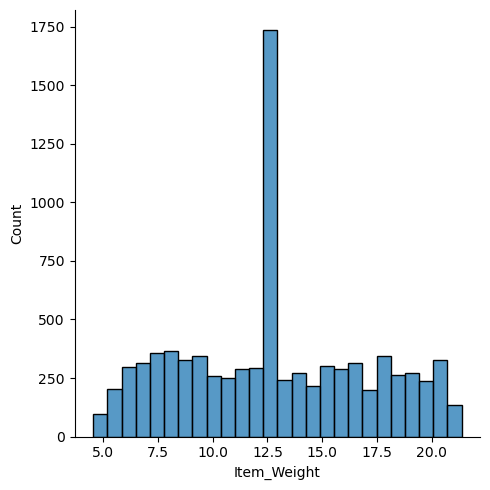

In [70]:
#Weight of an items distribution
plt.figure(figsize=[6,6])
sns.displot(dataset['Item_Weight'])

<Figure size 600x600 with 0 Axes>

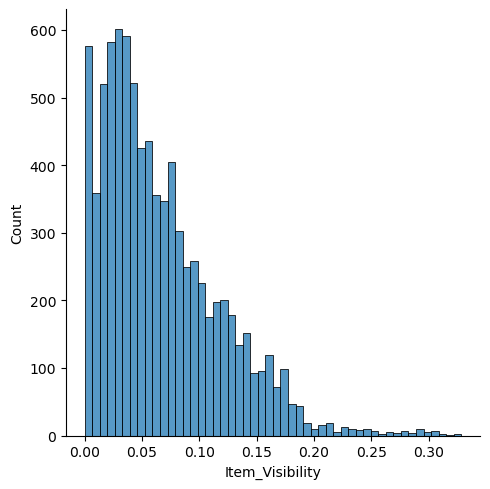

In [71]:
#Visibility of an item distribution
plt.figure(figsize=[6,6])
sns.displot(dataset['Item_Visibility'])

<Figure size 600x600 with 0 Axes>

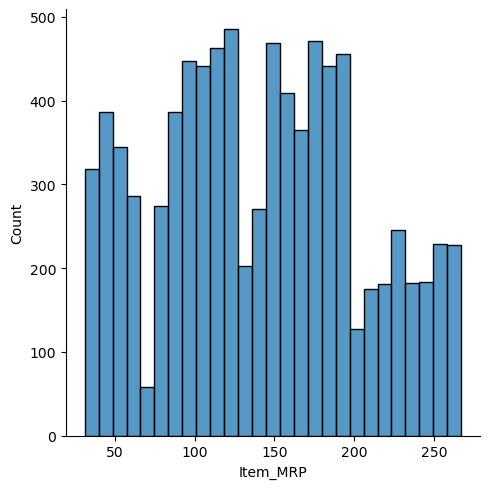

In [72]:
#Item MRP Distribution
plt.figure(figsize=[6,6])
sns.displot(dataset['Item_MRP'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

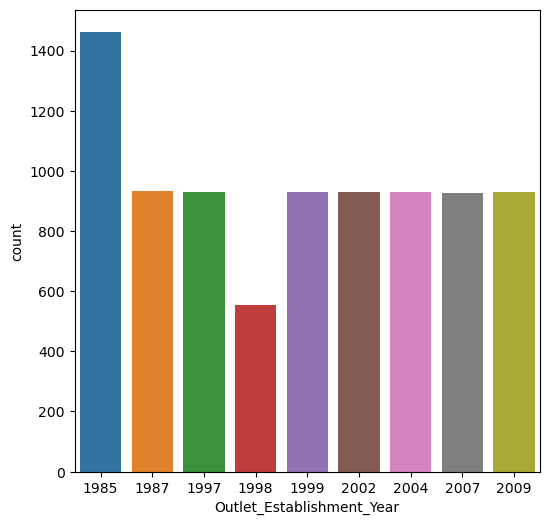

In [73]:
# Count of Outlets Established in particular year........
plt.figure(figsize=[6,6])
sns.countplot(x='Outlet_Establishment_Year', data=dataset)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

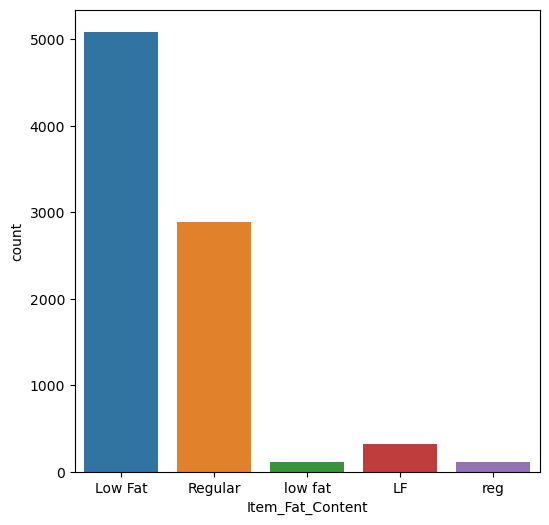

In [74]:
plt.figure(figsize=[6,6])
sns.countplot(x='Item_Fat_Content', data=dataset)

<Axes: xlabel='Item_Type', ylabel='count'>

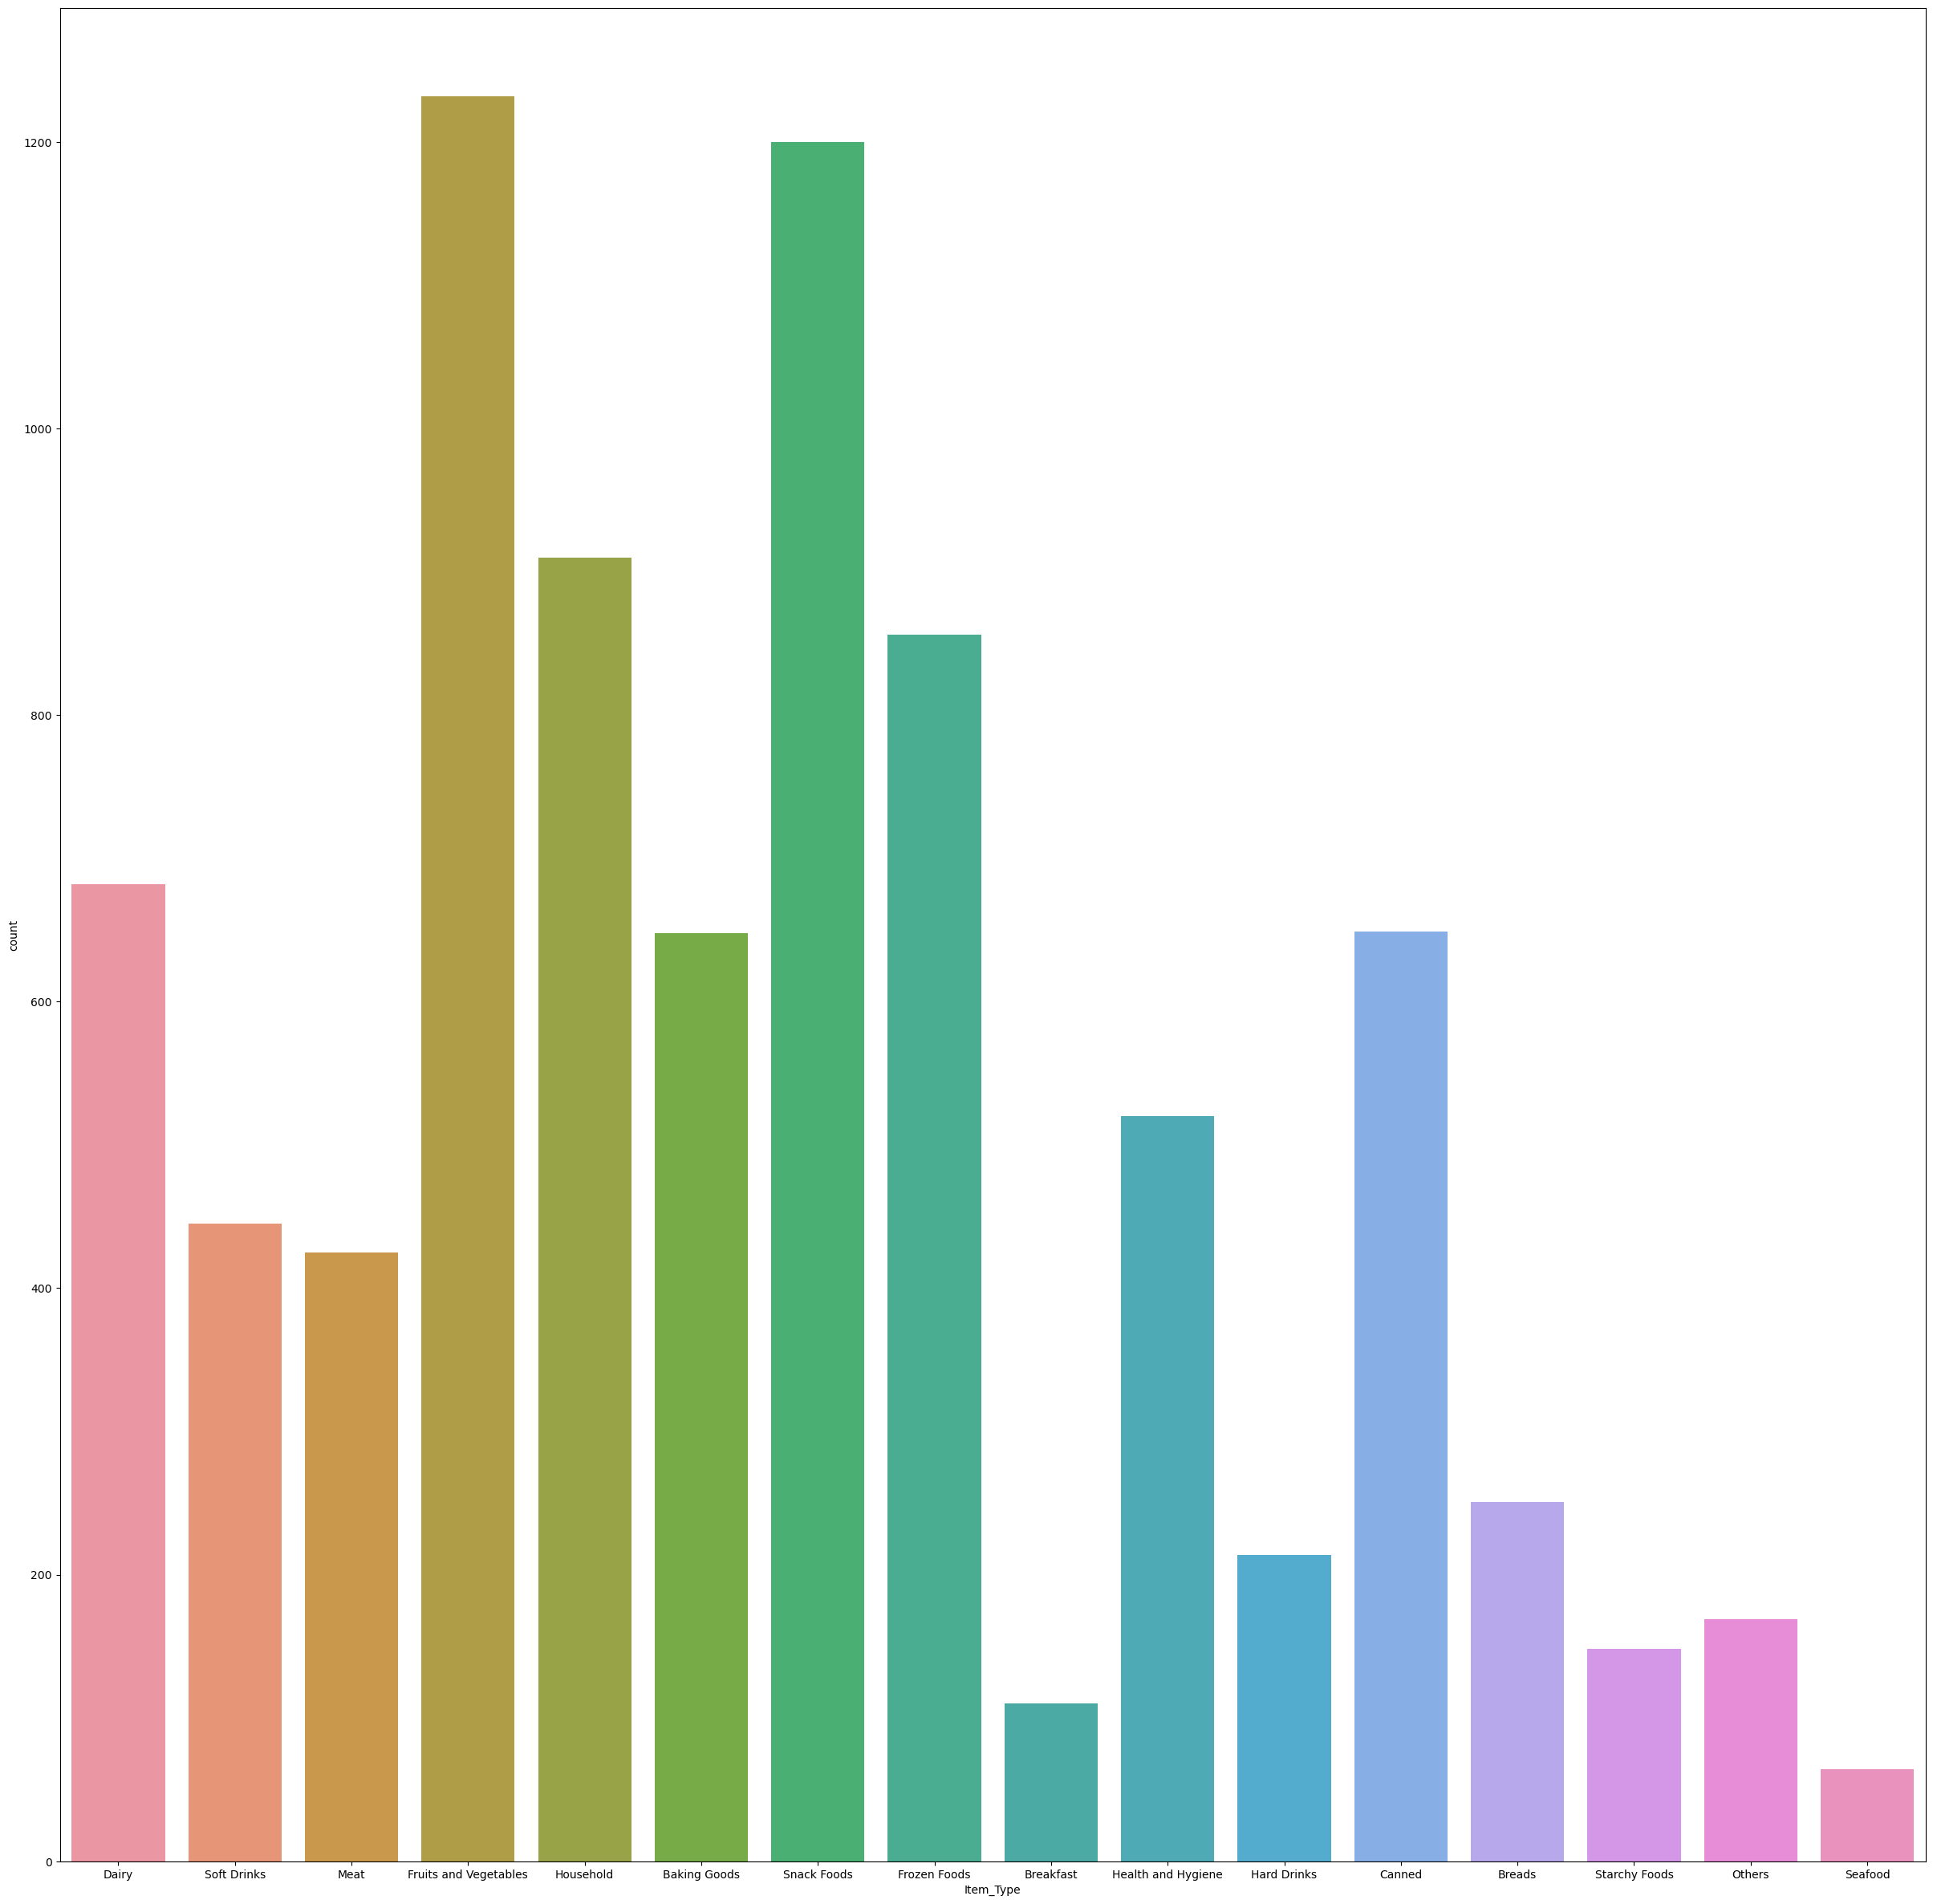

In [75]:
plt.figure(figsize=[30,30])
sns.countplot(x='Item_Type', data=dataset)

<Axes: xlabel='Outlet_Size', ylabel='count'>

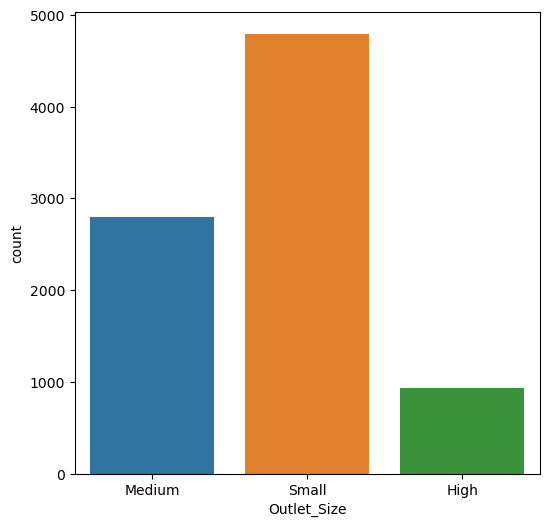

In [76]:
plt.figure(figsize=[6,6])
sns.countplot(x='Outlet_Size', data=dataset)

# Label Encoding

In [77]:
encoder = LabelEncoder()

In [78]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
dataset["Item_Identifier"] = encoder.fit_transform(dataset['Item_Identifier'])
dataset["Item_Fat_Content"] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset["Item_Type"] = encoder.fit_transform(dataset['Item_Type'])
dataset["Outlet_Identifier"] = encoder.fit_transform(dataset['Outlet_Identifier'])
dataset["Outlet_Size"] = encoder.fit_transform(dataset['Outlet_Size'])
dataset["Outlet_Location_Type"] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset["Outlet_Type"] = encoder.fit_transform(dataset['Outlet_Type'])

In [80]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [82]:
X = dataset.drop(['Item_Outlet_Sales'], axis=1)
Y = dataset['Item_Outlet_Sales']

In [83]:
model = XGBRegressor()

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [96]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
X_train_prediction = model.predict(X_train)

In [100]:
error_score_train = metrics.r2_score(X_train_prediction, Y_train)
error_score_train

0.8003271636866267

In [101]:
X_test_prediction = model.predict(X_test)

In [103]:
error_score_test = metrics.r2_score(X_test_prediction, Y_test)
error_score_test

0.24020309105618265